In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
covid_filepath = "dataset/OurWorldinDataCOVID-19/owid-covid-data.csv"
covid_data = pd.read_csv(covid_filepath, index_col="date", parse_dates=True)
covid_data.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


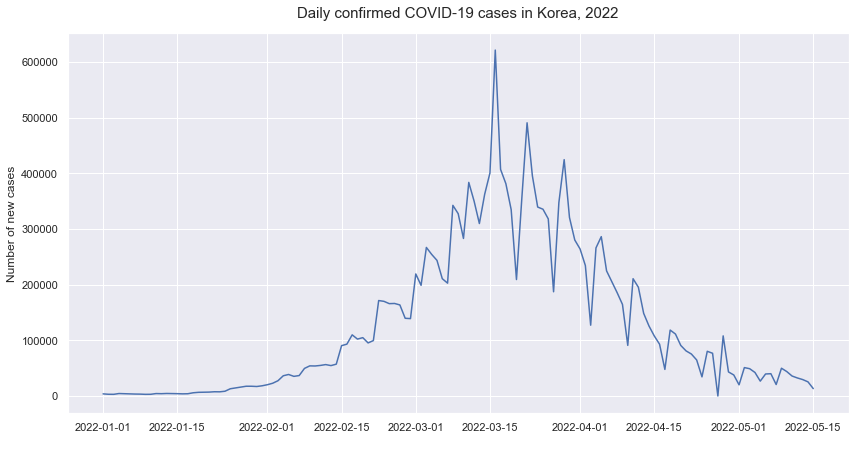

In [3]:
covid_KOR_data = covid_data[covid_data['iso_code'] == 'KOR']

sns.set_theme() 

plt.figure(figsize=(14,7))

ax = sns.lineplot(data=covid_KOR_data['new_cases']['2022-01-01':])

ax.set(xlabel=" ", ylabel="Number of new cases")
ax.set_title("Daily confirmed COVID-19 cases in Korea, 2022", fontsize=15, pad=15)
plt.show()

<ipython-input-4-7afe9ab7f72a>:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


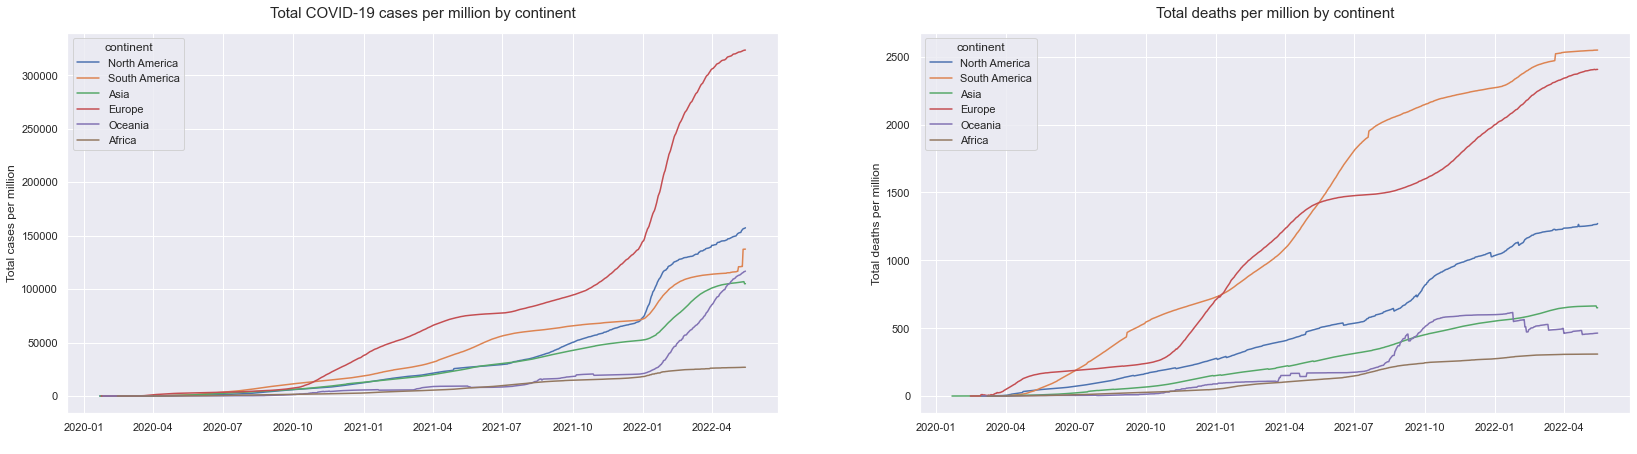

In [4]:
index = ['continent',
         'total_cases_per_million', 
         'new_cases_per_million',
         'total_deaths_per_million', 
         'people_vaccinated_per_hundred',
         'people_fully_vaccinated_per_hundred']

covid_data_continent = covid_data[index].reset_index().groupby(['date', 'continent'], as_index=False).mean().set_index('date')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 7))
plt.subplots_adjust(hspace=0.2)

ax1.set(xlabel=" ", ylabel="Total cases per million")
ax1.set_title("Total COVID-19 cases per million by continent", fontsize=15, pad=15)
sns.lineplot(x='date', y='total_cases_per_million',hue='continent', data=covid_data_continent.reset_index(), ax=ax1)

ax2.set(xlabel=" ", ylabel="Total deaths per million")
ax2.set_title("Total deaths per million by continent", fontsize=15, pad=15)
sns.lineplot(x='date', y='total_deaths_per_million',hue='continent', data=covid_data_continent.reset_index(), ax=ax2)

fig.show()

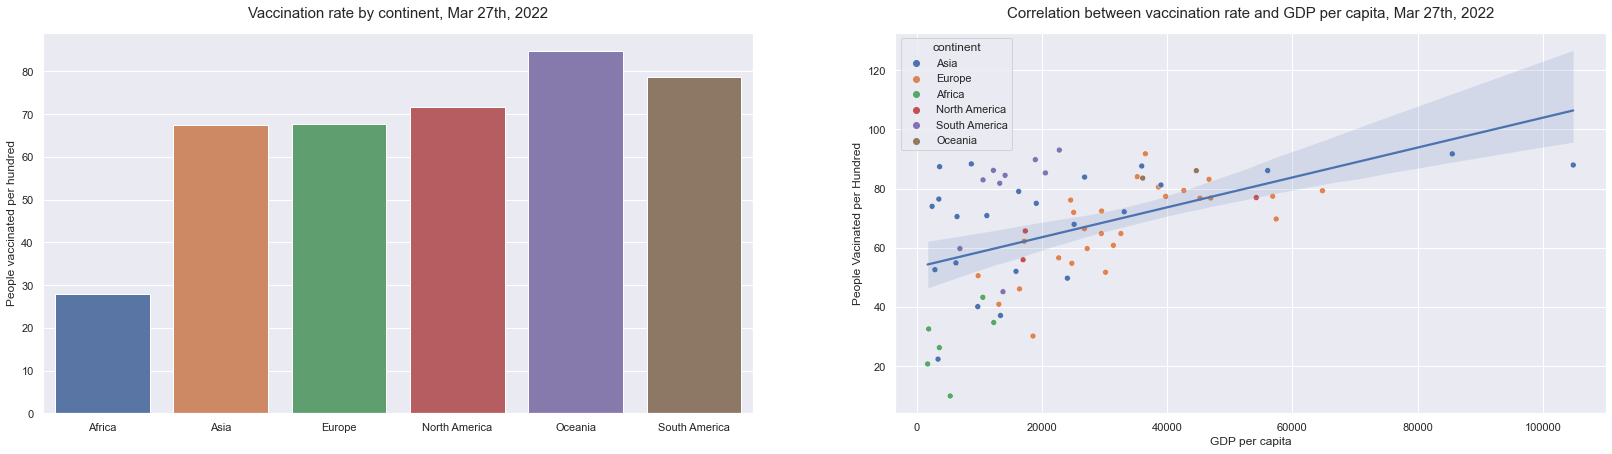

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28,7))
plt.subplots_adjust(hspace=0.2)

ax1 = sns.barplot(x=covid_data_continent['continent']['2022-03-27'], y=covid_data_continent['people_vaccinated_per_hundred']['2022-03-27'], ax=ax1)
ax1.set(xlabel=" ", ylabel="People vaccinated per hundred")
ax1.set_title("Vaccination rate by continent, Mar 27th, 2022", fontsize=15, pad=15)

sns.scatterplot(x=covid_data['gdp_per_capita']['2022-03-27'], y=covid_data['people_vaccinated_per_hundred']['2022-03-27'], hue=covid_data['continent']['2022-03-27'])
ax = sns.regplot(x=covid_data['gdp_per_capita']['2022-03-27'], y=covid_data['people_vaccinated_per_hundred']['2022-03-27'],scatter=False)

ax2.set(xlabel="GDP per capita", ylabel="People Vacinated per Hundred")
ax2.set_title("Correlation between vaccination rate and GDP per capita, Mar 27th, 2022", fontsize=15, pad=15)

plt.show()